In [12]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [13]:
# summary of data
print('data size = ', digits.data.shape)
print('target size = ', digits.target.shape)
print(digits.DESCR)

data size =  (1797, 64)
target size =  (1797,)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels 

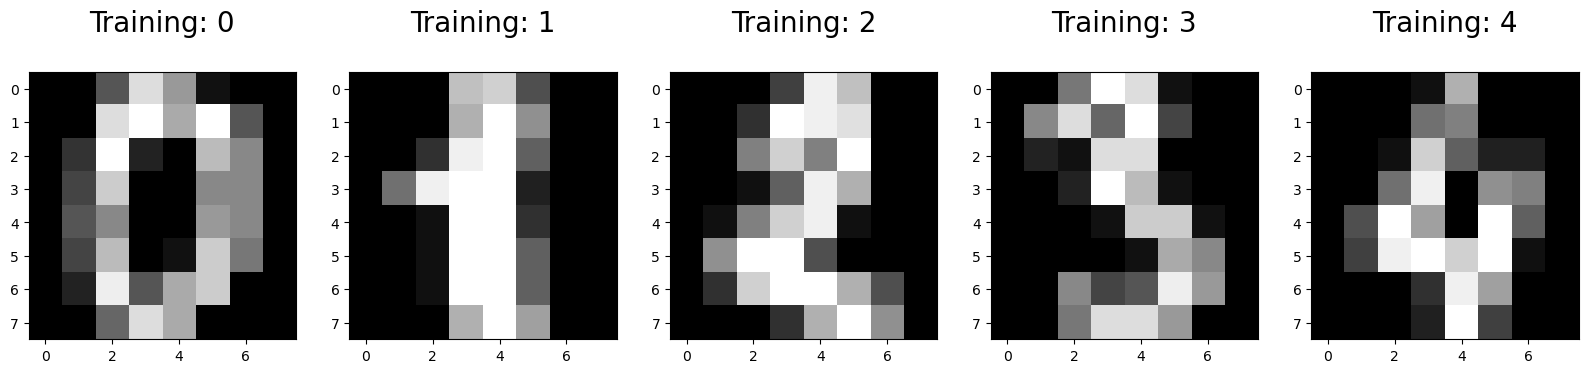

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# show examples of dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [15]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=8)
print(X_train[256], y_train[256])

[ 0.  0.  2. 16. 10.  0.  0.  0.  0.  0.  4. 16. 16.  5.  0.  0.  0.  0.
  8. 16. 16.  3.  0.  0.  0.  0.  9. 16. 16.  3.  0.  0.  0.  0.  8. 16.
 16.  3.  0.  0.  0.  0.  8. 16. 16.  1.  0.  0.  0.  0.  5. 16. 14.  0.
  0.  0.  0.  0.  1. 12. 16.  3.  0.  0.] 1


In [16]:
# 2 batch gradient descent (GD) for Logistic regression
def LogisticRegression_GD(X_train, y_train, learning_rate, eta=0.1, eps=1.0e-4, max_iter=5000):
    n_samples, n_features = X_train.shape
    n_classes = np.unique(y_train).shape[0]

    # Initialize weights and bias
    W = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))

    loss = []
    for iteration in range(max_iter):
        # Compute logits
        z = np.dot(X_train, W) + b  # Shape: (n_samples, n_classes)

        # Trick as suggested by exercise
        z_max = np.max(z, axis=1, keepdims=True)
        z_stable = z - z_max

        # Evaluate Softmax probabilities
        exp_z = np.exp(z_stable)
        sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
        P = exp_z / sum_exp_z  # Shape: (n_samples, n_classes)

        # Design the Y matrix
        Y = np.zeros_like(P)
        Y[np.arange(n_samples), y_train] = 1

        # Gradient computation *(following the derivation from the exercise)
        dW = (1 / n_samples) * np.dot(X_train.T, (P - Y)) + eta * W
        db = (1 / n_samples) * np.sum(P - Y, axis=0, keepdims=True) + eta * b

        # Update weights
        W -= learning_rate * dW
        b -= learning_rate * db

        # Compute loss (cross-entropy + regularization)
        log_probs = -np.log(P[np.arange(n_samples), y_train])
        loss_value = (1 / n_samples) * np.sum(log_probs) + (eta / 2) * (np.sum(W * W) + np.sum(b * b))
        loss.append(loss_value)

        # Check for convergence
        if iteration > 0 and abs(loss[iteration] - loss[iteration - 1]) <= eps:
            print(f'Converged at iteration {iteration}')
            break

    return W, b, loss


---------------------------------------
Learning rate = 0.05
Converged at iteration 263
Training precision = 0.9866369710467706
Test precision = 0.9644444444444444
Final value of F(W) = 0.18458527451377854
---------------------------------------
Learning rate = 0.005


Converged at iteration 345
Training precision = 0.9747587230883444
Test precision = 0.9644444444444444
Final value of F(W) = 0.1899186233955925
---------------------------------------
Learning rate = 0.01
Converged at iteration 239
Training precision = 0.9769858945805494
Test precision = 0.9666666666666667
Final value of F(W) = 0.180397075694624


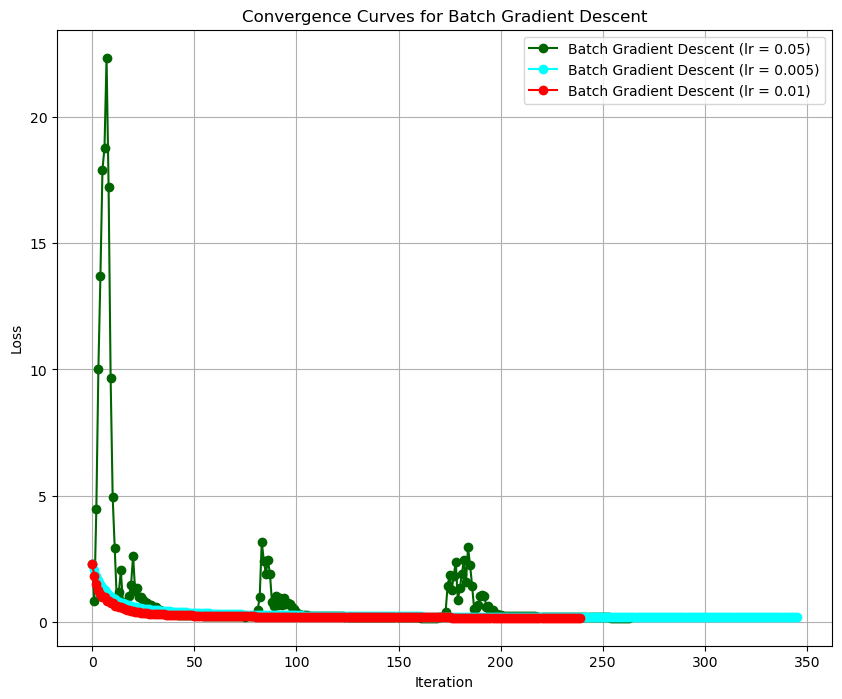

In [17]:
# Evaluation of different learning rates
learning_rate = [5.0e-2, 5.0e-3, 1.0e-2]
cl = ['darkgreen', 'cyan', 'red']
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(learning_rate)):
    
    print('---------------------------------------')
    print('Learning rate =', learning_rate[i])
    
    # Train the logistic regression model
    W, b, loss_GD = LogisticRegression_GD(X_train, y_train, learning_rate[i])
    
    # Evaluate training accuracy/precision
    z_train = np.dot(X_train, W) + b
    y_pred_train = np.argmax(z_train, axis=1)
    prec_train = np.mean(y_pred_train == y_train)  # Calculate training precision
    print('Training precision =', prec_train)

    # Evaluate test accuracy/precision
    z_test = np.dot(X_test, W) + b
    y_pred_test = np.argmax(z_test, axis=1)
    prec_test = np.mean(y_pred_test == y_test)  # Calculate test precision
    print('Test precision =', prec_test)

    # Final value of F(W)
    final_loss = loss_GD[-1]
    print('Final value of F(W) =', final_loss)

    # Convergence curves
    plt.plot(loss_GD, c=cl[i], ls='-', marker='o', label='Batch Gradient Descent (lr = ' + str(learning_rate[i]) + ')')

plt.grid()
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence Curves for Batch Gradient Descent')
plt.savefig("HW3_ex1_2")
plt.show()


In [18]:
# 4 Stochastic Gradient Descent (SGD) for Logistic Regression

def LogisticRegression_SGD(X, y, batch_size, lr=1.0e-2, eta=2.0e-1, eps=1.0e-4, max_epoch=500):
    
    n_samples, n_features = X.shape
    n_classes = np.unique(y).shape[0]

    # Initialize weights and bias
    W = np.zeros((n_features, n_classes))
    b = np.zeros((1, n_classes))
    
    notstop = True
    epoch = 0
    loss = []    

    # Optimization loop	
    while notstop and epoch < max_epoch:
        # Shuffle the data (for random selection)
        permutation = np.random.permutation(n_samples)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        # Mini-batch SGD
        for i in range(0, n_samples - batch_size + 1, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]

            # Compute logits
            z = np.dot(X_batch, W) + b  # Shape: (batch_size, n_classes)

            # Numerical stability trick
            z_max = np.max(z, axis=1, keepdims=True)
            z_stable = z - z_max

            # Softmax probabilities
            exp_z = np.exp(z_stable)
            sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)
            P = exp_z / sum_exp_z  # Shape: (batch_size, n_classes)

            # One-hot encoding of y_batch
            Y_batch = np.zeros_like(P)
            Y_batch[np.arange(len(y_batch)), y_batch] = 1

            # Gradient computation
            dW = (1 / batch_size) * np.dot(X_batch.T, (P - Y_batch)) + eta * W
            db = (1 / batch_size) * np.sum(P - Y_batch, axis=0, keepdims=True) + eta * b

            # Update weights and bias
            W -= lr * dW
            b -= lr * db

        # Compute loss on the entire dataset after each epoch
        z_full = np.dot(X, W) + b
        z_max_full = np.max(z_full, axis=1, keepdims=True)
        z_stable_full = z_full - z_max_full
        exp_z_full = np.exp(z_stable_full)
        sum_exp_z_full = np.sum(exp_z_full, axis=1, keepdims=True)
        P_full = exp_z_full / sum_exp_z_full
        log_probs_full = -np.log(P_full[np.arange(n_samples), y])
        loss_value = (1 / n_samples) * np.sum(log_probs_full) + (eta / 2) * (np.sum(W * W) + np.sum(b * b))
        loss.append(loss_value)

        # Half lr if not improving in 10 epochs
        if epoch > 10:
            if loss[epoch - 10] <= loss[epoch] - eps:
                lr *= 0.5
                print('Reduce learning rate to', lr)

        # Stop if not improving in 20 epochs
        if epoch > 20:
            if loss[epoch - 20] <= loss[epoch] - eps or abs(loss[epoch] - loss[epoch - 1]) <= eps:
                notstop = False
                break

        epoch += 1

    return (W, b, loss)


---------------------------------------
Batch size = 10
Reduce learning rate to 0.005
Reduce learning rate to 0.0025
Reduce learning rate to 0.00125
Training precision = 0.9836674090571641
Test precision = 0.9711111111111111
Final value of F(W) = 0.23255421911220003
---------------------------------------
Batch size = 50
Reduce learning rate to 0.0025
Training precision = 0.9829250185597624
Test precision = 0.9733333333333334
Final value of F(W) = 0.23301128931532486
---------------------------------------
Batch size = 100
Training precision = 0.9732739420935412
Test precision = 0.96
Final value of F(W) = 0.24193730361550594


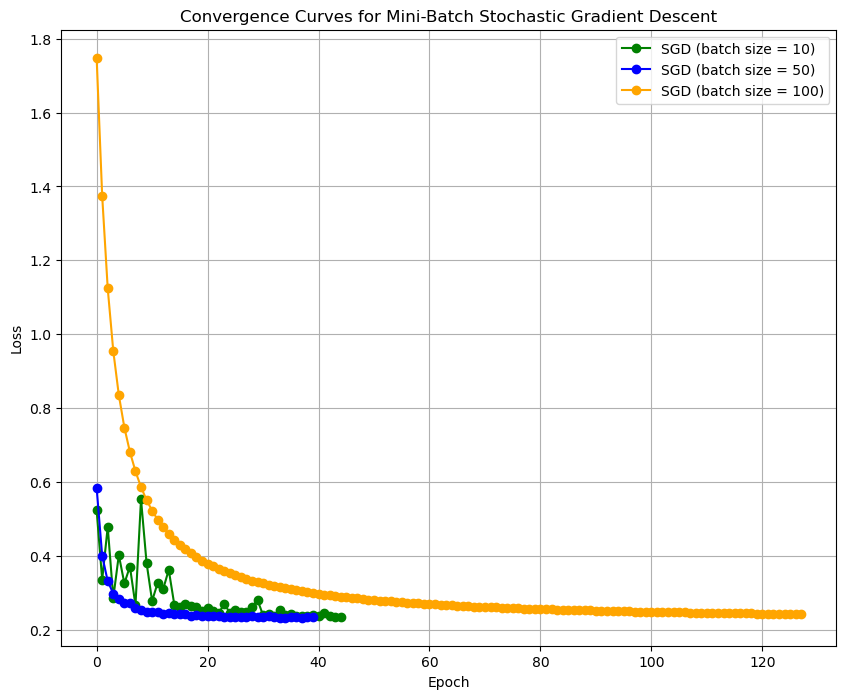

In [19]:
# Evaluation of different batch sizes
bs = [10, 50, 100]
cl = ['green', 'blue', 'orange']
# Different learning rates for different batch sizes
lr = [1.0e-2, 5.0e-3, 1.0e-3]  # Assigning distinct learning rates for each batch size
fig, ax = plt.subplots(figsize=(10, 8))

for i in range(len(bs)):
    print('---------------------------------------')
    print('Batch size =', bs[i])
    W_sgd, b_sgd, loss_SGD = LogisticRegression_SGD(
        X_train, y_train, batch_size=bs[i], lr=lr[i], eta=2.0e-1, eps=1.0e-4, max_epoch=500)
    
    # Evaluate training precision
    z_train = np.dot(X_train, W_sgd) + b_sgd
    y_pred_train = np.argmax(z_train, axis=1)
    prec_train = np.mean(y_pred_train == y_train)
    print('Training precision =', prec_train)
    
    # Evaluate test precision
    z_test = np.dot(X_test, W_sgd) + b_sgd
    y_pred_test = np.argmax(z_test, axis=1)
    prec_test = np.mean(y_pred_test == y_test)
    print('Test precision =', prec_test)
    
    # Report the final value of F(W)
    final_loss = loss_SGD[-1]
    print('Final value of F(W) =', final_loss)
    
    # Plot convergence curve
    plt.plot(loss_SGD, c=cl[i], ls='-', marker='o', label=f'SGD (batch size = {bs[i]})')

plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Convergence Curves for Mini-Batch Stochastic Gradient Descent')
plt.savefig("HW3_ex1_4")
plt.show()


---------------------------------------
Batch size = 10
Training precision = 0.9806978470675576
Test precision = 0.9666666666666667
Final value of F(W) = 0.2332430183620111
---------------------------------------
Batch size = 50
Reduce learning rate to 0.0025
Training precision = 0.9806978470675576
Test precision = 0.9666666666666667
Final value of F(W) = 0.23289000892087963
---------------------------------------
Batch size = 100
Reduce learning rate to 0.005
Training precision = 0.9769858945805494
Test precision = 0.9622222222222222
Final value of F(W) = 0.23771308787953768


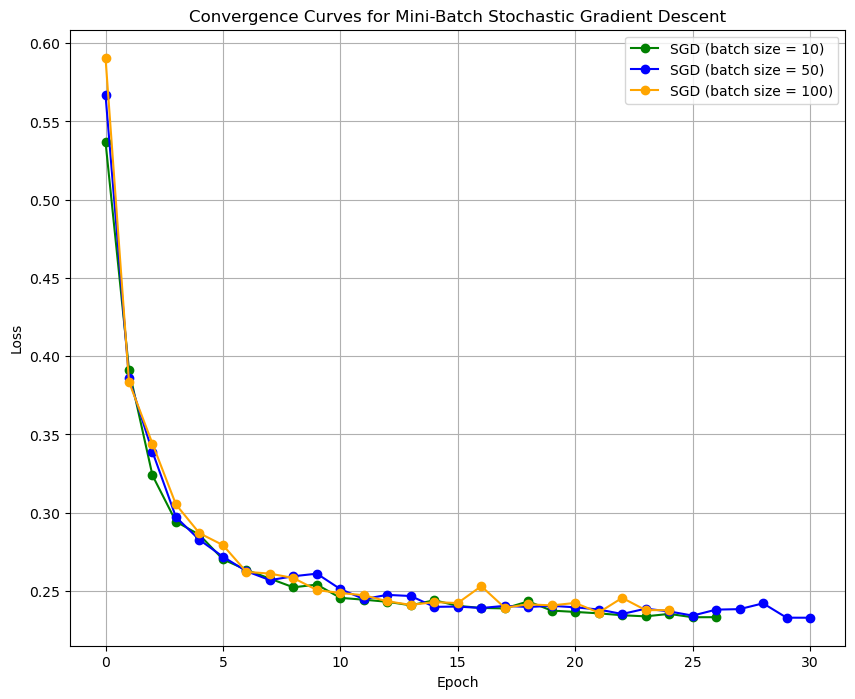

In [20]:
# Tuning the learning rate based on batch size

# Define batch sizes
bs = [10, 50, 100]

# Base learning rate
base_lr = 1.0e-3

# Scale learning rates based on batch size
lr_values = [base_lr * (bs_item / 10) for bs_item in bs]

# Initialize a figure for plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through each batch size to train the model
for i in range(len(bs)):
    print('---------------------------------------')
    print('Batch size =', bs[i])
    
    # Perform logistic regression using SGD with the current batch size and tuned learning rate
    W_sgd, b_sgd, loss_SGD = LogisticRegression_SGD(
        X_train, y_train, batch_size=bs[i], lr=lr_values[i], eta=2.0e-1, eps=1.0e-4, max_epoch=500)
    
    # Evaluate training precision
    z_train = np.dot(X_train, W_sgd) + b_sgd
    y_pred_train = np.argmax(z_train, axis=1)
    prec_train = np.mean(y_pred_train == y_train)
    print('Training precision =', prec_train)
    
    # Evaluate test precision
    z_test = np.dot(X_test, W_sgd) + b_sgd
    y_pred_test = np.argmax(z_test, axis=1)
    prec_test = np.mean(y_pred_test == y_test)
    print('Test precision =', prec_test)
    
    # Report the final value of F(W)
    final_loss = loss_SGD[-1]
    print('Final value of F(W) =', final_loss)
    
    # Plot convergence curve for the current batch size
    plt.plot(loss_SGD, c=cl[i], ls='-', marker='o', label=f'SGD (batch size = {bs[i]})')

# Customize plot appearance
plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Convergence Curves for Mini-Batch Stochastic Gradient Descent')

# Save the figure
plt.savefig("HW3_ex1_5")
plt.show()
